# 1 Introduction
short introduction to the assignment, relevance and some context etc...

# Data
Shortly describe used data

# 3 Theory
In this section, the theory behind each of the used concepts and algorithms will be explained with their relevant equations. We will first explain the concept behind cross-validation and how it applies to our data. Then we will describe the 5 algorithms, starting with the four approaches classified as 'naive' because they are relatively easy and quick to calculate and implement. These naive approaches however cannot be used for the normalization of ratings and the cumulative improvement of the RMSE, so we will also evaluate two other approaches. 

## 3.1 Cross-validation
To make sure that our results are reliable, we are interested in the accuracy of our model on data that was not used in the training process, and we will apply the 5-fold cross-validation scheme to achieve this. The whole data set is randomly split into 5 parts of more or less equal sizes, and we will then develop 5 models for each combination of 4 our of 5 parts. Each of the 5 parts is therefore used once as a test set, while the model is trained on the remaining 4 sets. Each of the obtained models is then tested to the test set that was not used to train the model. This way we generated 5 different estimates of the model accuracy, and their average is considered to be a good estimate of the error on the future data. <br>
In this assignment, our training sets consist of ~800.000 ratings, and we will test the created model on the remaining ~200.000 ratings (test set). This was done 5 times to the completely unique test sets (this means that if all 5 test sets are combined, we obtain the total data set consisting of ~1.000.000 ratings again).

## 3.2 Naive Approaches
The following formulas that represent the 4 naive approaches were taken from slide 17.
### 3.2.1 Naive Approach 1: Global average rating
$\;\;\;\;\;\;$ $R_{global}(User, Item) = \text{mean(all ratings})$ $\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$(1)<br>
For the first naive approach we calculated the global average rating by averaging all ratings. The empty movie-user pairs (i.e. every user-movie element in the ratings data that is not rated yet) in the training set were then simply filled with this global average rating. 
### 3.2.2 Naive Approach 2: Average rating per movie
$\;\;\;\;\;\;$ $R_{item}(User, Item) = \text{mean(all ratings for Item})$ $\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$(2)<br>
The second naive approach uses the average rating for every movie. As mentioned in the assignment, some movies might dissapear from the training sets as all their ratings will enter the test set. To handle such cases, we used the "global average rating" as a fall-back value. 
### 3.2.3 Naive Approach 3: Average rating per user
$\;\;\;\;\;\;$ $R_{user}(User, Item) = \text{mean(all ratings for User})$ $\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$(3)<br>
The third naive approach is very similar to the second one; we now calculate the average rating for every user. As mentioned in the assignment, some users might dissapear from the training sets as all their ratings will enter the test set. To handle such cases, we again used the "global average rating" as a fall-back value. 
### 3.2.4 Naive Approach 4: Linear regression with intercept $\gamma$
Concerning the linear regression models, we used the "full" variant of linear regression (i.e. included the $\gamma$ parameter): <br>
$\;\;\;\;\;\;$ $R_{user-item}(User, Item) = \alpha*R_{user}(User, Item) + \beta*R_{item}(User, Item) + \gamma $  $\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;$$\;\;\;\;$$\;\;\;\;\;\;$ (4)<br>
$\alpha$, $\beta$ and the intercept parameter $\gamma$ are all estimated with linear regression using the training set. Using this method, every user-movie pair gets a unique rating, although the ratings can be very similar (to 7 or 8 decimals).

# 3.3 UV Matrix Decomposition
Jim?


## 3.4 Matrix factorization

The idea behind matrix factorization is similar to that of UV matrix decomposition discussed earlier. We will follow the approach taken in the paper [$\textit{gravity-Tikk.pdf}$](https://www.cs.uic.edu/~liub/KDD-cup-2007/proceedings/gravity-Tikk.pdf) (2007). Here our goal is also to approximate the matrix with ratings, now called X, as the product of two matrices U and M:<br>
### $\;\;\;\;\;\;$ $X\approx U\cdot M$, $\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$(1)<br>
where U is an I x K and M is a K x J matrix, so that u$_{ik}$ and m$_{kj}$ can be treated as the kth feature of the ith user and the jth movie respectively. The major differences with the UV decomposition is that we update the matrices U and M differently, and that they are also initialized differently. <br>
<br>
We first initialize the two matrices U and M by filling them with values between 0 and 1. We then iterate over each known rating element of X and compute the training error on the (i, j)th example:<br>
### $\;\;\;\;\;\;$ e$_{ij}$ = x$_{ij}$ - $ \sum_{k=1}^{K} u_{ik}m_{kj}  $, $\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$(2)<br>
where e$_{ij}$ is the training error on the (i, j)th example and x$_{ij}$ is an element in the matrix X. u$_{ij}$ and m$_{ij}$ denote the elements of U and M, so the sum in eq.2 denotes how the ith user would rate the jth movie according to the model. <br>
To minimize the RMSE, we have applied a simple gradient descent method to find a local minimum. The gradient of $e^2_{ij}$ is given by:<br>
### $\;\;\;\;\;\;$ $\frac{\partial}{\partial u_{ik}}e^2_{ij} = -2 e_{ij} \cdot m_{kj} $, $\frac{\partial}{\partial m_{kj}}e^2_{ij} = -2 e_{ij} \cdot u_{ik} $$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$(3)<br>
We then updated the weights in U and M in the opposite direction of the gradient to decrease the error, thereby better approximating x$_{ij}$. Furthermore, a regularization which prevents large weights is implemented to obtain a better prediction for unseen examples. The updated elements can now be calculated according to eq.3:<br>
### $\;\;\;\;\;\;$ u'$_{ik}$ = u$_{ik}$ + $\eta$(2e$_{ij}$m$_{kj}$ - $\lambda$u$_{ik}$$)$, $\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$(4)<br>
### $\;\;\;\;\;\;$ m'$_{kj}$ = m$_{kj}$ + $\eta$(2e$_{ij}$u$_{ik}$ - $\lambda$m$_{kj}$$)$, $\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;\;\;\;\;$$\;\;$(5) <br>
where $\eta$ is the learning rate and $\lambda$ is the regularization.

We through each known element of X which is not in the probe subset and apply eq.6 & 7 to update U and M. After each loop the RMSE w.r.t. the probe subset is computed to see if it has improved (i.e. decreased) from the previous iteration. For this assignment, we used a dimension of K=10 for the matrices U and M, a regularization of r=0.05, a learling rate of l=0.005 and a stop at 75 iterations through the loop. If the RMSE did not improve during two iterations, the loop is also terminated. 

# 4.1 Naive Approaches

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import sys
import os

import datetime
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [51]:
#Users data
usersData = pd.read_csv('users.dat', sep='::', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], engine='python')

#Ratings data
ratingsData = pd.read_csv('ratings.dat', sep='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python')

#Movies data
moviesData = pd.read_csv('movies.dat', sep='::', header=None, names=['MovieID', 'Title', 'Genres'], engine='python', encoding='latin1')

#Users data
print("usersData:")
print(usersData.head())

#Ratings data
print("\nratingsdata:")
print(ratingsData.head())

#Movies data
print("\nmoviesData:")
print(moviesData.head())

usersData:
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

ratingsdata:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

moviesData:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


# 4.1.1 Naive Approach 1: Global average rating

In [52]:
#Calculating the Global Average Rating
globalAvgRating = ratingsData["Rating"].mean()
print("The Global Average Rating is", globalAvgRating)

The Global Average Rating is 3.581564453029317


In [53]:
#Initialising the variables for error metrics
totalMAE = 0
totalRMSE = 0

#Performing 5 fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

for train_index, test_index in kf.split(ratingsData):
    trainSet = ratingsData.iloc[train_index]
    testSet = ratingsData.iloc[test_index]

    #Global average Rating
    globalAverageRating = trainSet["Rating"].mean()

    #Dictionaries to store user and movie average ratings
    userAverageRating = trainSet.groupby("UserID")["Rating"].mean().to_dict()
    movieAverageRating = trainSet.groupby("MovieID")["Rating"].mean().to_dict()

    #List to store predictions
    predictions = []

    #Iterating through the test set and make predictions
    for _, row in testSet.iterrows():
        user_id = row["UserID"]
        movie_id = row["MovieID"]

        #Condition to check if user or movie is not in the training data
        if user_id not in userAverageRating or movie_id not in movieAverageRating:
            predictedRating = globalAverageRating
        else:
            #Calculating the predicted rating using the user and movie average
            predictedRating = (
                userAverageRating.get(user_id, globalAverageRating)
                + movieAverageRating.get(movie_id, globalAverageRating)
                - globalAverageRating
            )

        # Ensure the predicted rating is within the valid range [1, 5]
        predictedRating = min(5, max(1, predictedRating))

        predictions.append(predictedRating)

    #Replacing the NAN values with global average rating
    predictions = [globalAvgRating if np.isnan(x) else x for x in predictions]

    #Calculating MAE and RMSE
    mae = mean_absolute_error(testSet["Rating"], predictions)
    rmse = np.sqrt(mean_squared_error(testSet["Rating"], predictions))

    totalMAE += mae
    totalRMSE += rmse

# Calculate the average MAE and RMSE over all folds
averageMAE = totalMAE / 5
averageRMSE = totalRMSE / 5

print("The Average MAE is", averageMAE)
print("The Average RMSE is", averageRMSE)

The Average MAE is 0.7327214582778845
The Average RMSE is 0.933967790381811


# 4.1.2 Naive Approach 2: Average rating per movie

In [54]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

MAE_Scores = []
RMSE_Scores = []

for train_index, test_index in kf.split(ratingsData):
    trainSet, testSet = ratingsData.iloc[train_index], ratingsData.iloc[test_index]

    #Avereage rating for each of the movies
    AvgMovieRating = ratingsData.groupby('MovieID')['Rating'].mean().to_dict()

    #Predicting the movie ratings in the test set and getting a copy of the slice
    testSet = testSet.copy()
    testSet['PredictedRating'] = testSet['MovieID'].map(AvgMovieRating)

    #MAE & RMSE
    MAE = mean_absolute_error(testSet['Rating'], testSet['PredictedRating'])
    RMSE = mean_squared_error(testSet['Rating'], testSet['PredictedRating'], squared=False)

    MAE_Scores.append(MAE)
    RMSE_Scores.append(RMSE)

# Calculate average MAE and RMSE over all folds
Avg_MAE = np.mean(MAE_Scores)
Avg_RMSE = np.mean(RMSE_Scores)

print("The Average MAE is", Avg_MAE)
print("The Average RMSE is", Avg_RMSE)

The Average MAE is 0.77879021845446
The Average RMSE is 0.9747113013367519


# 4.1.3 Naive Approach 3: Average rating per user

In [55]:
#User Average rating
kf = KFold(n_splits=5, shuffle=True, random_state=1)

MAE_Scores = []
RMSE_Scores = []

for train_index, test_index in kf.split(ratingsData):
    trainSet, testSet = ratingsData.iloc[train_index], ratingsData.iloc[test_index]

    # Avg user rating for the training set
    AvgUserRating = trainSet.groupby('UserID')['Rating'].mean().to_dict()

    #Predicting the user ratings in the test set and getting a copy of the slice
    testSet = testSet.copy()
    testSet['PredictedRating'] = testSet['UserID'].map(AvgUserRating)

    #MAE and RMSE
    MAE = mean_absolute_error(testSet['Rating'], testSet['PredictedRating'])
    RMSE = np.sqrt(mean_squared_error(testSet['Rating'], testSet['PredictedRating']))

    MAE_Scores.append(MAE)
    RMSE_Scores.append(RMSE)

# Calculate average MAE and RMSE over all folds
Avg_MAE = np.mean(MAE_Scores)
Avg_RMSE = np.mean(RMSE_Scores)

print("The Average MAE is", Avg_MAE)
print("The Average RMSE is", Avg_RMSE)

The Average MAE is 0.8290076950378935
The Average RMSE is 1.0354887413559268


# 4.1.4 Naive Approach 4: Linear regression with intercept $\gamma$

In [62]:
# Initialising the variables for error metrics
totalMAE_userItem = 0
totalRMSE_userItem = 0

count_kfold = 1
# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

alpha, beta, gamma, RMSE = [], [], [], []

for train_index, test_index in kf.split(ratingsData):
    train_set = ratingsData.iloc[train_index]
    test_set = ratingsData.iloc[test_index]

    # Linear regression to estimate alpha, beta_user, and gamma_userItem
    X = train_set[['UserID', 'MovieID']]
    y = train_set['Rating']

    model = LinearRegression()
    model.fit(X, y)

    alpha_userItem = model.coef_[0]
    alpha.append(alpha_userItem)
    beta_userItem = model.coef_[1]
    beta.append(beta_userItem)
    gamma_userItem = model.intercept_
    gamma.append(gamma_userItem)

    # To store predictions for Ruser-item(user, item)
    predictions_userItem = []

    #Iterating the testset to make the predictions
    for _, row in test_set.iterrows():
        user_id = row['UserID']
        movie_id = row['MovieID']

        #Calculating the predicted rating
        if user_id in userAverageRating and movie_id in movieAverageRating:
            predictedRating_UserItem = alpha_userItem * userAverageRating[user_id] + beta_userItem * movieAverageRating[movie_id] + gamma_userItem
        else:
            predictedRating_UserItem = globalAvgRating

       #Checking that the predicted rating is within the valid range [1,5]
        predictedRating_UserItem = min(5, max(1, predictedRating_UserItem))
        predictions_userItem.append(predictedRating_UserItem)

    #Calculating MAE and RMSE for Ruser-item(user, item)
    mae_userItem = mean_absolute_error(test_set['Rating'], predictions_userItem)
    rmse_userItem = np.sqrt(mean_squared_error(test_set['Rating'], predictions_userItem))

    totalMAE_userItem += mae_userItem
    totalRMSE_userItem += rmse_userItem
    
    RMSE.append(rmse_userItem)
    
    count_kfold += 1

#Calculating the average MAE & RMSE for Ruser-item(user,item) overall folds
averageMAE_userItem = totalMAE_userItem / 5
averageRMSE_userItem = totalRMSE_userItem / 5

#print the found values of alpha, beta, gamma and the RMSE for every fold 
print("\nFor fold 1: ")
print("alpha = ", alpha[0], "beta = ", beta[0], "gamma = ", gamma[0], "RMSE = ", RMSE[0])
print("\nFor fold 2: ")
print("alpha = ", alpha[1], "beta = ", beta[1], "gamma = ", gamma[1], "RMSE = ", RMSE[1])
print("\nFor fold 3: ")
print("alpha = ", alpha[2], "beta = ", beta[2], "gamma = ", gamma[2], "RMSE = ", RMSE[2])
print("\nFor fold 4: ")
print("alpha = ", alpha[3], "beta = ", beta[3], "gamma = ", gamma[3], "RMSE = ", RMSE[3])
print("\nFor fold 5: ")
print("alpha = ", alpha[4], "beta = ", beta[4], "gamma = ", gamma[4], "RMSE = ", RMSE[4])


print("\nThe Average of alpha is", (alpha[0]+alpha[1]+alpha[2]+alpha[3]+alpha[4])/5)
print("The Average of beta is", (beta[0]+beta[1]+beta[2]+beta[3]+beta[4])/5)
print("The Average of gamma is", (gamma[0]+gamma[1]+gamma[2]+gamma[3]+gamma[4])/5)

print("\nThe Average MAE for Ruser-item(user, item) is", averageMAE_userItem)
print("The Average RMSE for Ruser-item(user, item) is", averageRMSE_userItem)


For fold 1: 
alpha =  6.783141972199692e-06 beta =  -6.45928889400591e-05 gamma =  3.6815259814475048 RMSE =  1.120688769999563

For fold 2: 
alpha =  6.49156923096687e-06 beta =  -6.555495413579753e-05 gamma =  3.6847200077716016 RMSE =  1.1232959555074935

For fold 3: 
alpha =  7.758749109455263e-06 beta =  -6.487328497086093e-05 gamma =  3.6796767384662963 RMSE =  1.123964662285164

For fold 4: 
alpha =  7.947901399707865e-06 beta =  -6.512290382819396e-05 gamma =  3.6784218057858014 RMSE =  1.1186357776547278

For fold 5: 
alpha =  7.11746387283407e-06 beta =  -6.520975642971364e-05 gamma =  3.6812560297311996 RMSE =  1.1210429591912459

The Average of alpha is 7.2197651170327525e-06
The Average of beta is -6.507075766092503e-05
The Average of gamma is 3.6811201126404804

The Average MAE for Ruser-item(user, item) is 0.9189404451158604
The Average RMSE for Ruser-item(user, item) is 1.1215256249276389


# 4.2 UV Matrix Decomposition

In [63]:
def preprocessing(utility_matrix):
    """
    Preprocessing a utility matrix using the method described in paragraph 9.4.5 of the book.

    Arguments:
        utility_matrix (numpy.ndarray): utility matrix to be preprocesed

    Return:
        numpy.ndarray: preprocessed utility matrix

    Below function performs the mean-centering on the utility matrix, it calculates the mean of the each row and 
    subtracts it from all the non NAN elements in the same row and then it calculates the mean of the each column 
    and subtracts it from all non NAN elements in the same column. As a result the utility matrix with row and 
    column means centered around zero.
    """
    M = np.copy(utility_matrix)

    numRows = np.shape(M)[0]
    numCol = np.shape(M)[1]

    for i in range(numRows):
        rowMean = np.nanmean(M[i, :])
        for j in range(numCol):
            if not math.isnan(M[i, j]):
                M[i, j] -= rowMean

    for j in range(numCol):
        columnMean = np.nanmean(M[:, j])
        for i in range(numRows):
            if not math.isnan(M[i, j]):
                M[i, j] -= columnMean
    return M

In [64]:
def initUV(M, d, useMean):
    """
    Initializing the matrices U and V

    Arguments:
        M (numpy.ndarray): utility matrix.
        d (int): number of latent factors.
        useMean (bool): If true, initialize U and V with mean-based scaling.

    Returns:
        tuple: tuple contains the initialized U and V matrices.

    Below function initilise the U & V matrices. At first it generates random values between 0 & 1 for u and v. If use_mean is true, it further scales the matrices
    by a scalar calculated from teh mean of the utilitiy matrix and the number of latent factors. The initialized u and v matrices are returned as a tuple.
    """
    numRows = np.shape(M)[0]
    numCol = np.shape(M)[1]

    # Initialize U and V with random values between 0 and 1
    U = np.random.rand(numRows, d)
    V = np.random.rand(d, numCol)

    if useMean:
        scalar = np.sqrt(np.nanmean(M) / (d * numRows))
        return scalar * U, scalar * V
    return U, V

In [65]:
def optimizeElements(M, U, V):
    """
    It Optimises the elements of matrices U and V

    Arguments:
        M (numpy.ndarray): utility matrix.
        U (numpy.ndarray): U matrix.
        V (numpy.ndarray): V matrix.

    Returns:
        tuple: tuple contais the optimized U and V matrices.

    Below function optimises the elements of matrices u and v. It iterates through the rows and columns fo the utility matrix M, and updating the elements
    of u and v. Then the updated u and v matrices are returned as tuple.
    """
    numRows = np.shape(M)[0]
    numCol = np.shape(M)[1]
    d = np.shape(U)[1]

    for r in range(numRows):
        for s in range(d):
            totalNom = 0
            totalDenom = 0
            for j in range(numCol):
                if not math.isnan(M[r, j]):
                    eps = 0
                    for k in range(d):
                        if k != s:
                            eps += U[r, k] * V[k, j]
                    totalNom += V[s, j] * (M[r, j] - eps)
                    denom = (V[s, j]) ** 2
                    totalDenom += denom
            U[r, s] = totalNom / totalDenom

    for r in range(d):
        for s in range(numCol):
            totalNom = 0
            totalDenom = 0
            for i in range(numRows):
                if not math.isnan(M[i, s]):
                    eps = 0
                    for k in range(d):
                        if k != r:
                            eps += U[i, k] * V[k, s]
                    totalNom += U[i, r] * (M[i, s] - eps)
                    denom = (U[i, r]) ** 2
                    totalDenom += denom
            V[r, s] = totalNom / totalDenom
    return U, V

In [66]:
def convergeUV(M_train, M_test, U, V):
    """
    It iterates to converge U and V

    Arguments:
        M_train (numpy.ndarray): training utility matrix.
        M_test (numpy.ndarray): test utility matrix.
        U (numpy.ndarray): initial U matrix.
        V (numpy.ndarray): initial V matrix.

    Returns:
        tuple: tuple contains the converged U and V matrices, the predicted P matrix, and the final RMSE.

    Below function iterates and updates the u and v matrices until the convergence. It compares the predicted P matrix and caluclates the RMSE to check
    for convergence. The iteration continues until the difference between the old and new RMSE is less than 1e-5, the converged u and v matrices,
    along with the predicted P matrix and final RMSE are returned as a tuple.
    """
    count = 0
    rmseOld = float('inf')
    rmseNew = 1

    while (rmseOld - rmseNew) > 1e-5:
        U, V = optimizeElements(M_train, U, V)
        P = np.dot(U, V)
        diff = M_test - P
        rmseOld = rmseNew
        rmseNew = np.sqrt(np.nanmean(diff ** 2))
        if count_kfold==1: #add the RMSE values per iterations to lists
            RMSE_valuesUV1.append(rmseNew)
        if count_kfold==2:
            RMSE_valuesUV2.append(rmseNew)
        if count_kfold==3:
            RMSE_valuesUV3.append(rmseNew)
        if count_kfold==4:
            RMSE_valuesUV4.append(rmseNew)
        if count_kfold==5:
            RMSE_valuesUV5.append(rmseNew)
        count += 1

    return U, V, P, rmseNew

In [67]:
def saveUVMatrices(U, V, foldNum, output_dir):
    uFilename = os.path.join(output_dir, f"U_matrix_fold{foldNum}.npy")
    vFilename = os.path.join(output_dir, f"V_matrix_fold{foldNum}.npy")
    np.save(uFilename, U)
    np.save(vFilename, V)
    
RMSE_valuesUV1, RMSE_valuesUV2, RMSE_valuesUV3, RMSE_valuesUV4, RMSE_valuesUV5 = [], [], [], [], []
    
count_kfold = 1
kf = KFold(n_splits=5, shuffle=True, random_state=1)

totalRMSE = 0
output_dir = "/content"
os.makedirs("/content/aidm", exist_ok=True)

# Initializing an empty list to store the RMSE values for each fold
rmseValues = []

for train_index, test_index in kf.split(ratingsData):
    print("\nFold number:", count_kfold)
    now = datetime.datetime.now()
    print("Time at the start of fold number", count_kfold, ":", now.strftime("%Y-%m-%d %H:%M:%S"))

    train_set = ratingsData.iloc[train_index]
    test_set = ratingsData.iloc[test_index]

    #Determining the common set of movies and users in both set
    common_users = np.intersect1d(train_set['UserID'], test_set['UserID'])
    common_movies = np.intersect1d(train_set['MovieID'], test_set['MovieID'])

    #Filtering the data to include only common movie and users
    train_set = train_set[(train_set['UserID'].isin(common_users)) & (train_set['MovieID'].isin(common_movies))]
    test_set = test_set[(test_set['UserID'].isin(common_users)) & (test_set['MovieID'].isin(common_movies))]

    #Converting the data into numpy arrays
    df_train = train_set.pivot(index="UserID", columns="MovieID", values="Rating")
    df_test = test_set.pivot(index="UserID", columns="MovieID", values="Rating")
    M_train = np.array(df_train.to_numpy())
    M_test = np.array(df_test.to_numpy())

    print("Training set:")
    print(M_train)
    print("Test set:")
    print(M_test)

    Ui, Vi = initUV(M_train, 2, False)
    U, V, P, rmse = convergeUV(M_train, M_test, Ui, Vi)
    rmseValuesFold = []

    #Initialising rmseOld to a large value
    rmseOld = float('inf')
    #Initilising the convergence threshold
    convergenceThreshold = 0.001

    print("Training matrix M:\n", M_train)
    print("Predicted matrix P:\n", P)

    while True:
        U, V, P, rmse = convergeUV(M_train, M_test, Ui, Vi)
        #appending the RMSE at each itteration
        rmseValuesFold.append(rmse)
        #updating ui & vi for the next iteration
        Ui, Vi = U, V

        #checking the convergence based on the change in RMSE
        if abs(rmse - rmseOld) < convergenceThreshold:
            break

        rmseOld = rmse

    saveUVMatrices(U, V, count_kfold, output_dir)
    #Appending the RMSE values for the fold
    rmseValues.append(rmseValuesFold)
    print("RMSE estimate of fold number", count_kfold, ":", rmse)

    totalRMSE += rmse
    count_kfold += 1

#Saving the RMSE values for each fold
for i, rmseValuesFold in enumerate(rmseValues):
    print(f'fold_{i + 1}', rmseValuesFold)
    np.save(f'fold_{i + 1}_rmse.npy', rmseValuesFold)

# Calculate the average RMSE over all folds
averageRMSE = totalRMSE / 5

print("The Average RMSE is", averageRMSE)


Fold number: 1
Time at the start of fold number 1 : 2023-10-22 23:31:32
Training set:
[[ 5. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 3. nan nan ... nan nan nan]]
Test set:
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Training matrix M:
 [[ 5. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 3. nan nan ... nan nan nan]]
Predicted matrix P:
 [[4.35090176 4.09479066 4.23102657 ... 3.87897414 3.07974534 3.91235348]
 [4.10898715 3.39081867 3.3087058  ... 3.67348403 3.48808703 3.72884566]
 [4.32249524 3.62690474 3.56703023 ... 3.86308207 3.59644972 3.91832268]
 ...
 [3.56312727 2.16886475 1.75625176 ... 3.20197595 3.96350366 3

[0.9477720289401695, 0.9174736567377744, 0.9157136399554221, 0.9152495058938311, 0.9149336666259786, 0.9144912647233852, 0.9138389391931654, 0.9129499225639855, 0.9118079589810262, 0.9104079851038334, 0.9087654857843999, 0.9069157876720311, 0.9049112499265307, 0.9028181977243892, 0.9007114980985546, 0.8986661757483615, 0.8967490361532985, 0.8950141797302787, 0.8935011429875575, 0.8922309199873998, 0.8911998751187444, 0.8903825065001963, 0.8897482699418707, 0.8892745186867242, 0.8889429298713295, 0.8887323627261361, 0.8886177743650729, 0.8885737277363861, 0.8885785293303804, 0.8886159458557458, 0.8886748931895475, 0.8887484110707103, 0.8888324420765696]
Training set 1: RMSE =  0.8888324420765696
Training set 2: RMSE =  0.8876422118523113
Training set 3: RMSE =  0.8840672403118945
Training set 4: RMSE =  0.8863436577854473
Training set 5: RMSE =  0.8868710216852542


NameError: name 'averageRMSE_UV' is not defined

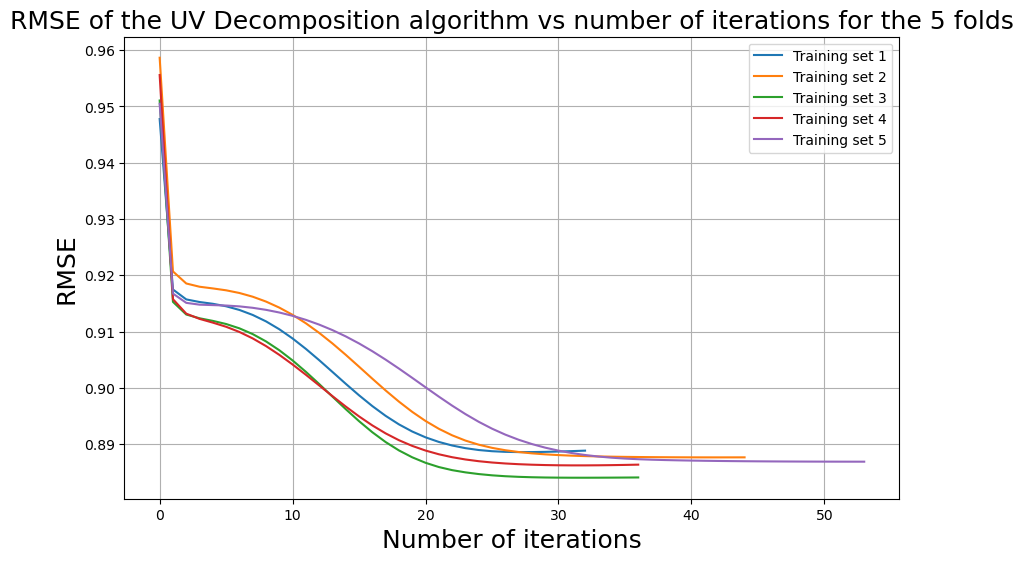

In [68]:
print(RMSE_valuesUV1)

plt.figure(figsize=(10, 6))
plt.plot(RMSE_valuesUV1, label="Training set 1")
plt.plot(RMSE_valuesUV2, label="Training set 2")
plt.plot(RMSE_valuesUV3, label="Training set 3")
plt.plot(RMSE_valuesUV4, label="Training set 4")
plt.plot(RMSE_valuesUV5, label="Training set 5")
plt.xlabel("Number of iterations", fontsize=18)
plt.ylabel("RMSE", fontsize=18)
plt.legend()
plt.grid()
plt.title("RMSE of the UV Decomposition algorithm vs number of iterations for the 5 folds", fontsize=18)

print("Training set 1: RMSE = ", RMSE_valuesUV1[-1])
print("Training set 2: RMSE = ", RMSE_valuesUV2[-1])
print("Training set 3: RMSE = ", RMSE_valuesUV3[-1])
print("Training set 4: RMSE = ", RMSE_valuesUV4[-1])
print("Training set 5: RMSE = ", RMSE_valuesUV5[-1])
print("Average over 5 sets: RMSE = ", averageRMSE_UV)

# 4.3 Matrix Factorization

In [69]:
def init_UM(X_train, K):
    """
    This function initializes two matrices U and V for the UV-decomposition
    
    Arguments:
        X_train: Training matrix of this fold
        K: Number of factors
        
    Returns:
        The matrices U and M with random weights
    """
    
    I, J = X_train.shape
    U_i = np.random.rand(I, K) #U is an I x K matrix with randomly distributed weights 
    M_i = np.random.rand(J, K) #M is an K x J matrix with randomly distributed weights 

    return U_i, M_i



In [70]:
def optimize_elements(X_train, K, num_iter, r, l, U, M):
    """
    Perform a single round of optimization for the U and M matrices using the equations from page 3.4 
    
    Arguments:
        X_train: Training matrix of this fold
        K: Number of factors
        num_iter: number of iterations
        r: regularization factor
        l: learning rate
        U & M: input matrices U and M that should be updated
        
    Returns:
        The updated matrices U and M
    """

    I, J = X_train.shape

    for i in range(I):
        for j in range(J):
            if X_train[i, j] >0: #i.e. non-NaN
                eij = X_train[i, j] - np.dot(U[i, :], M[j, :])
                #eij denotes the training error on the (i, j)th example

                for k in range(K):
                    #For all latent features, apply eq.6&7 in gravity-Tikk.pdf
                    U[i, k] = U[i, k] + l * (2 * eij * M[j, k] - r * U[i, k])
                    M[j, k] = M[j, k] + l * (2 * eij * U[i, k] - r * M[j, k])

    return U, M




In [71]:
totalRMSE = 0

K, num_iter, r, l = 10, 75, 0.05, 0.005 #these are the parameters that are reported on the MyMedialite website

def converge_UM(X_train, X_test, U_i, M_i):
    """
    With this function we iterate upon the element optimization of U and V, stopping when the improvement 
    over the previous iteration becomes insignificant (<1e-5). 
    
    Arguments:
        X_train: Training matrix of this fold
        X_test: Test matrix of this fold
        U_i & M_i: original matrices U and M 
        
    Returns:
        The updated matrices U and M, the predicted matrix P and the rmse of P w.r.t. X_test
    """
    count = 1 #count the number of iterations
    
    
    #initialize the errors of the previous and current step such that the condition is held for the first loop 
    rmse_old = float('inf')
    rmse_new = 10

    
    while (rmse_old - rmse_new > 1e-5) and count <= num_iter:
        
        
        U,M = optimize_elements(X_train, K, num_iter, r, l, U_i, M_i)
        P = np.matmul(U, M.T)
        diff = X_test - P
        rmse_old = rmse_new
        rmse_new = np.sqrt(np.nanmean(diff**2)) #compute the Root-Mean Square Error between the two matrices M and P 

        if count_kfold==1: #add the RMSE values per iterations to lists
            RMSE_valuesMF1.append(rmse_new)
        if count_kfold==2:
            RMSE_valuesMF2.append(rmse_new)
        if count_kfold==3:
            RMSE_valuesMF3.append(rmse_new)
        if count_kfold==4:
            RMSE_valuesMF4.append(rmse_new)
        if count_kfold==5:
            RMSE_valuesMF5.append(rmse_new)
        print('loop number {}'.format(count), "RMSE:", rmse_new)
        count += 1
        
    return U,M,P, rmse_new #return the final, updated U and M


RMSE_valuesMF1, RMSE_valuesMF2, RMSE_valuesMF3, RMSE_valuesMF4, RMSE_valuesMF5 = [], [], [], [], []

count_kfold = 1
kf = KFold(n_splits=5, shuffle=True, random_state=1)

for train_index, test_index in kf.split(ratingsData):
    print("\nFold number:", count_kfold)
    now = datetime.datetime.now() #To check how long it takes to run 
    print ("Time at start of fold number", count_kfold, " :", now.strftime("%Y-%m-%d %H:%M:%S"))   
    
    train_set = ratingsData.iloc[train_index]
    test_set = ratingsData.iloc[test_index]
    
    # Save the user and movie IDs from the training/test set of this fold, for data visualisation later! 
    userIDs = df_train.index.values #test and train IDs are equivalent due to the condition above
    movieIDs = df_train.columns.to_list()
    np.save("userID_fold"+str(count_kfold), userIDs)
    np.save("movieID_fold"+str(count_kfold), movieIDs)
    
    #First, determine the common set of movies and users in both sets
    common_users = np.intersect1d(train_set['UserID'], test_set['UserID'])
    common_movies = np.intersect1d(train_set['MovieID'], test_set['MovieID'])

    # Filter the data to include only the common movies and users
    train_set = train_set[(train_set['UserID'].isin(common_users)) & (train_set['MovieID'].isin(common_movies))]
    test_set = test_set[(test_set['UserID'].isin(common_users)) & (test_set['MovieID'].isin(common_movies))]

    # Convert data into a numpy array
    df_train = train_set.pivot(index="UserID", columns="MovieID", values="Rating")
    df_test = test_set.pivot(index="UserID", columns="MovieID", values="Rating")
    X_train = np.array(df_train.to_numpy())
    X_test = np.array(df_test.to_numpy())
    
    print("Training set:")
    print(X_train)
    print("Test set:")
    print(X_test)

    U_i, M_i = init_UM(X_train, K)
    U, M, P, rmse = converge_UM(X_train, X_test, U_i, M_i)
    
    #After the optimization is done, print the training and predicted matrices again to possibly compare them
    print("Training matrix M:\n", X_train)
    print("Predicted matrix P:\n", P)

    print("RMSE estimate of fold number ", count_kfold, ": ", rmse)
    
    
    totalRMSE += rmse
    totalMAE += rmse**2
    

    np.save("predicted_U_"+str(count_kfold), U)
    np.save("predicted_M_"+str(count_kfold), M)
    count_kfold += 1
    

# Calculate the average RMSE over all folds
averageRMSE_MF = totalRMSE / 5
averageMAE_MF = totalMAE / 5

print("The Average RMSE is", averageRMSE_MF)




Fold number: 1
Time at start of fold number 1  : 2023-10-23 07:04:32
Training set:
[[ 5. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 3. nan nan ... nan nan nan]]
Test set:
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
loop number 1 RMSE: 1.0272188087362293
loop number 2 RMSE: 0.9390548482435581
loop number 3 RMSE: 0.9360088832380927
loop number 4 RMSE: 0.932944917881418
loop number 5 RMSE: 0.9277447567971365
loop number 6 RMSE: 0.9209847522412883
loop number 7 RMSE: 0.9144530307171602
loop number 8 RMSE: 0.9088800488082256
loop number 9 RMSE: 0.9042874348958532
loop number 10 RMSE: 0.9005735950979716
loop number 11 RMSE: 0.8975943388214619
loop number 12 RMSE: 0.8951943500756887
loop number 13 RMSE: 0.8932358609447277
loop number 

Training set 1: RMSE =  0.8797894204719197
Training set 2: RMSE =  0.8789942548170769
Training set 3: RMSE =  0.8764744378356082
Training set 4: RMSE =  0.8774541807464314
Training set 5: RMSE =  0.879070196686763
Average over 5 sets: RMSE =  0.8783564981115598


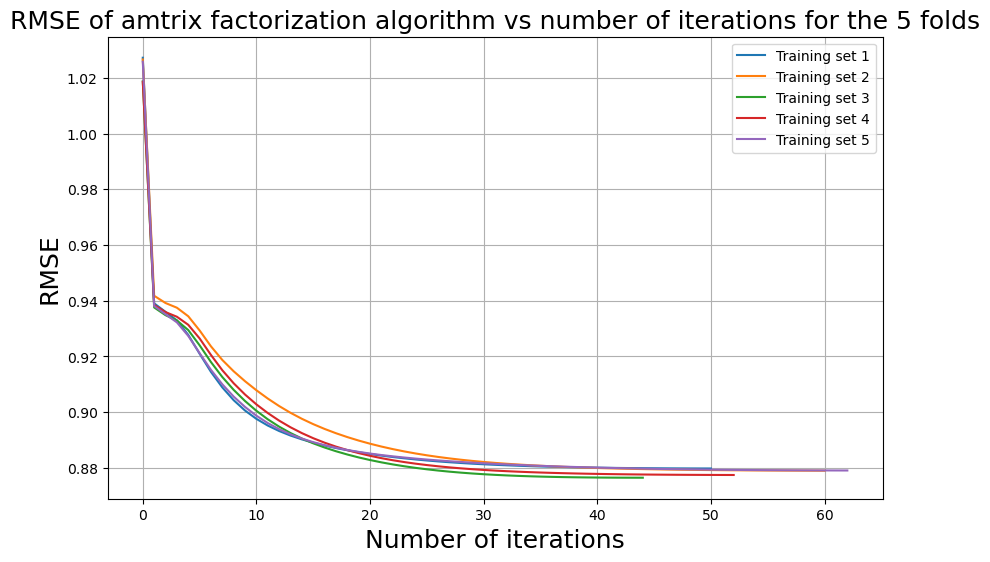

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(RMSE_valuesMF1, label="Training set 1")
plt.plot(RMSE_valuesMF2, label="Training set 2")
plt.plot(RMSE_valuesMF3, label="Training set 3")
plt.plot(RMSE_valuesMF4, label="Training set 4")
plt.plot(RMSE_valuesMF5, label="Training set 5")
plt.xlabel("Number of iterations", fontsize=18)
plt.ylabel("RMSE", fontsize=18)
plt.legend()
plt.grid()
plt.title("RMSE of amtrix factorization algorithm vs number of iterations for the 5 folds", fontsize=18)

print("Training set 1: RMSE = ", RMSE_valuesMF1[-1])
print("Training set 2: RMSE = ", RMSE_valuesMF2[-1])
print("Training set 3: RMSE = ", RMSE_valuesMF3[-1])
print("Training set 4: RMSE = ", RMSE_valuesMF4[-1])
print("Training set 5: RMSE = ", RMSE_valuesMF5[-1])
print("Average over 5 sets: RMSE = ", averageRMSE_MF)

# 5 Discussion

### 5.1 Comparing runtime
Compare runtime of the different algorithms

### 5.2 Comparing accuracy
Compare the different algorithms based on their RMSE values

# 6 Conclusion